In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Load dataset, rename columns

In [104]:
test_data = pd.read_csv('data/test_data_no_target.csv', delimiter=';')
train_data = pd.read_csv('data/training_data.csv', delimiter=';')

# Convert all columns except the first one to numeric
train_data = train_data.astype(str)
train_data.iloc[:,1:] = train_data.loc[:,'I1':'Perform'].applymap(lambda s: s.replace(",",".")).astype(float)

# Load the column dictionary from the CSV file into a DataFrame
column_dict_df = pd.read_csv('data/column_names_dictionary.csv', delimiter=';')

# Convert the column dictionary DataFrame to a dictionary
column_dict = dict(zip(column_dict_df['CODE'], column_dict_df['INDICATOR NAME']))
column_dict['Perform'] = 'Perform'  
column_dict['Class'] = 'Class' 

# Map the encrypted column names to their original names using the column dictionary
train_df = train_data.rename(columns=column_dict)
train_df.head()

/var/folders/l1/26hv4ds50v70g2zr2xbmd0bm0000gn/T/ipykernel_28132/574105120.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train_data.iloc[:,1:] = train_data.loc[:,'I1':'Perform'].applymap(lambda s: s.replace(",",".")).astype(float)


,Industry sector,"Return on Average Total Assets - %, TTM","Return on Average Common Equity - %, TTM","EBITDA Percentage of Common Equity, TTM","EBITDA Percentage of Total Fixed Assets - Net, TTM",Excess Cash Margin - %,"Free Cash Flow Percentage of Total Revenue, TTM","Cash Flow from Operations Pct of Total Revenue, TTM","Cash Flow from Operations Pct of Common Equity, TTM","Cash Flow from Operations to Total Assets, TTM",...,1-year Absolute Change of Working Capital to Total Assets,1-year Absolute Change of Cash Ratio,1-year Absolute Change of Net Debt to Total Equity,1-year Absolute Change of Total Liabilities Percentage of Total Assets,1-year Absolute Change of Long Term Debt Percentage of Total Assets,1-year Absolute Change of Book Value Percentage of Market Capitalization,1-year Absolute Change of Cash Flow from Operations Pct of Capital Expenditures,"1-year Absolute Change of Price to Cash Flow from Operations per Share, TTM",Class,Perform
0,G9,0.136495,-0.028429,-0.037772,-0.232459,-0.016222,-0.187506,-0.322545,-0.043743,0.125389,...,0.102563,0.188481,-0.016027,-0.135451,-0.189667,0.250967,0.022171,-0.004265,-1.0,-0.033764
1,G5,-0.714522,-0.042137,-0.052968,-0.796862,-0.018394,0.070102,-0.076321,-0.063864,-1.045521,...,-0.016375,0.020727,-0.006525,-0.018790,-0.098543,0.317744,-0.180502,-0.009215,1.0,0.127771
2,G10,0.104791,-0.038188,-0.053191,0.620233,0.148587,0.489875,0.319274,-0.060246,0.053174,...,0.272937,0.774169,-0.007144,0.123954,0.000000,-0.110103,0.186669,-0.030720,1.0,0.183500
3,G2,-0.532847,-0.006582,-0.023377,1.306702,-0.068909,0.048024,-0.119481,-0.021057,-1.012916,...,0.004938,0.018494,-0.003350,-0.029214,0.045747,-0.076884,-0.037859,-0.012046,-1.0,-0.035668
4,G3,-0.200815,-0.016334,-0.036754,-0.886675,0.484495,-1.148744,0.152517,-0.043580,-0.935537,...,-0.014812,-0.324584,-0.019002,-0.379323,-0.046024,0.282145,0.011008,0.010496,1.0,0.235055


### Descriptive Statistics

In [123]:
# Basic Descriptive Statistics
descriptive_stats = train_df.describe()
skewness = train_df.skew()
kurtosis = train_df.kurt() 

print("\nSkewness of each variable:\n", skewness.head(20).sort_values(ascending=False))
print("\nKurtosis of each variable:\n", kurtosis.head(20).sort_values(ascending=False))


Skewness of each variable:
 FCF Net of Dividends Pct of Debt, Pref Eq & Min Intr, TTM     54.099020
Reinvestment Rate - %, TTM                                    37.720581
Return on Average Common Equity - %, TTM                      35.561804
Dividend Payout Ratio - %, TTM                                34.721001
EBITDA Percentage of Common Equity, TTM                       33.170528
Cash Flow from Operations Pct of Common Equity, TTM           32.447622
Debt - Total to EBITDA, TTM                                   21.009600
Cash Percentage of Total Revenue, TTM                         12.360398
Net Debt to EBITDA, TTM                                       11.180516
Cash Flow from Operations Pct of Total Revenue, TTM            6.510415
Payables Turnover, TTM                                         5.578470
Free Cash Flow Percentage of Total Revenue, TTM                5.177635
Excess Cash Margin - %                                         4.688751
Solvency Ratio - %, TTM            

/var/folders/l1/26hv4ds50v70g2zr2xbmd0bm0000gn/T/ipykernel_28132/3755135943.py:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = train_df.skew()
/var/folders/l1/26hv4ds50v70g2zr2xbmd0bm0000gn/T/ipykernel_28132/3755135943.py:4: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis = train_df.kurt()


### Missing Values Analysis

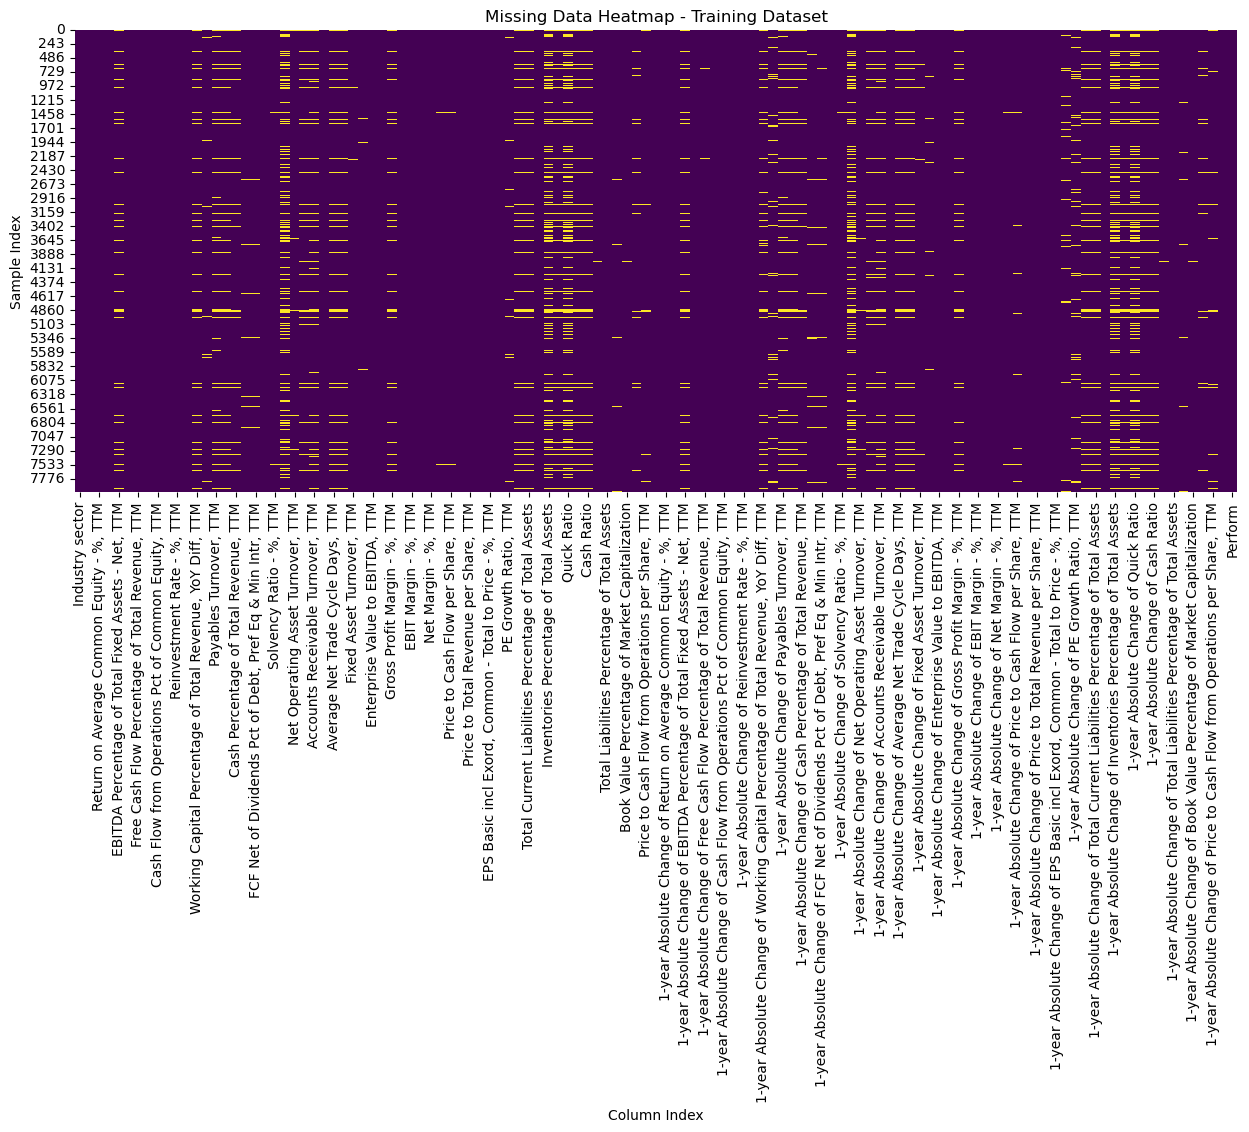

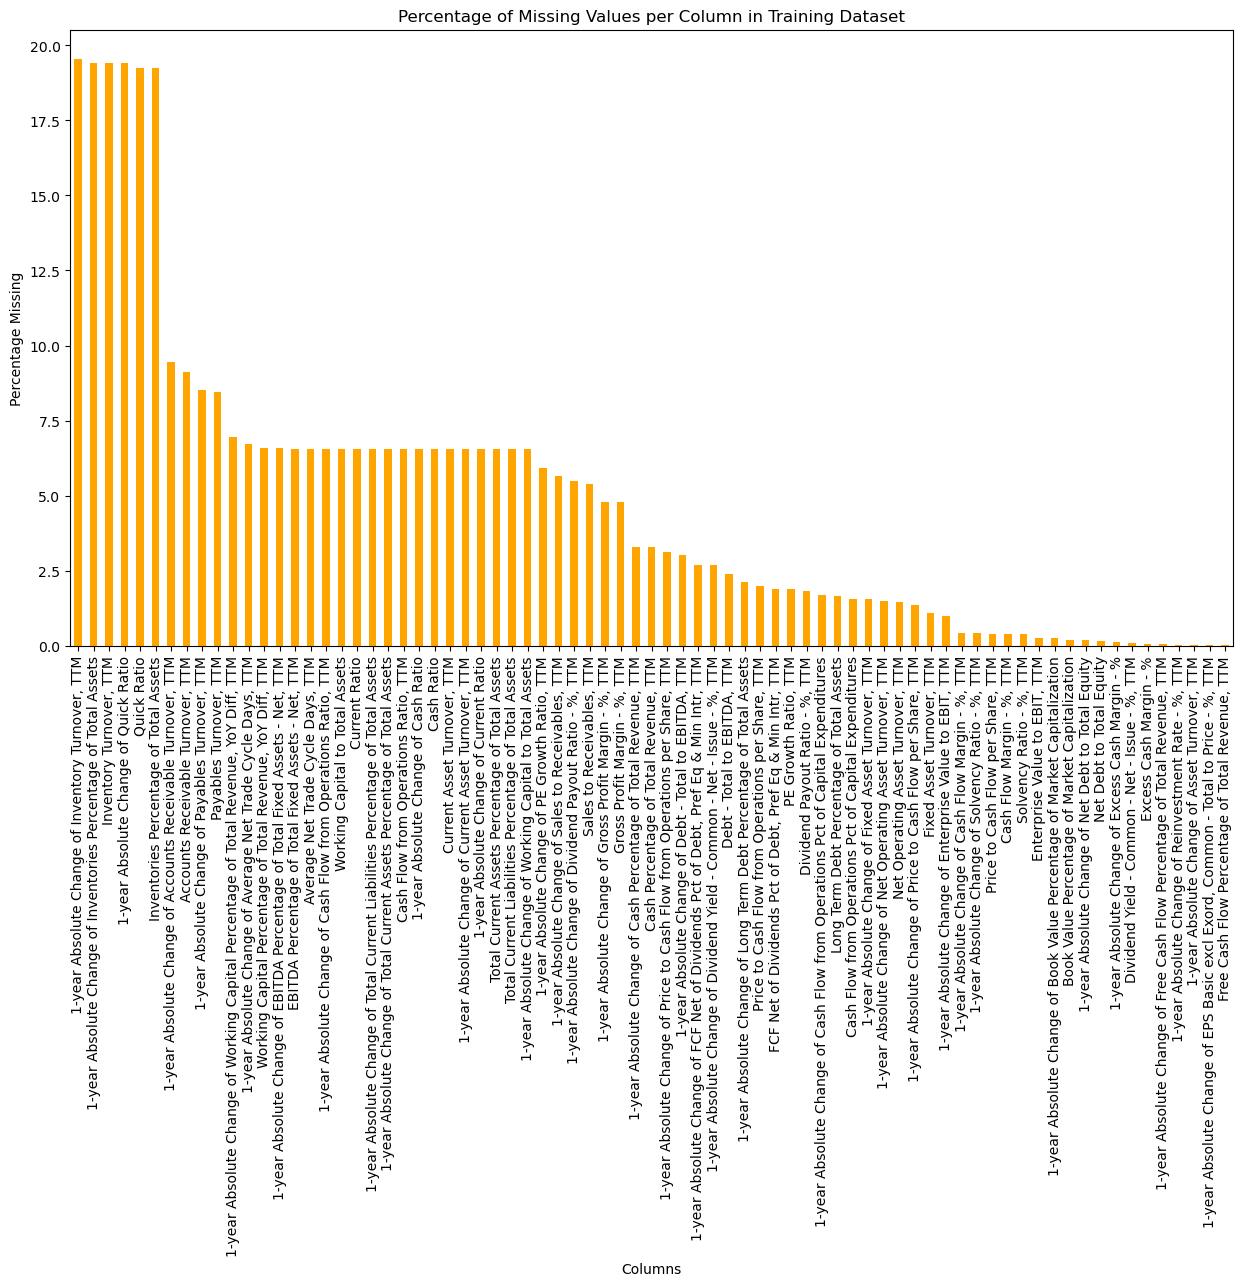

,Missing Values Training,Percentage Missing Training,Missing Values Test,Percentage Missing Test
"1-year Absolute Change of Inventory Turnover, TTM",1564.0,19.55,NaN,NaN
1-year Absolute Change of Inventories Percentage of Total Assets,1553.0,19.41,NaN,NaN
"Inventory Turnover, TTM",1553.0,19.41,NaN,NaN
1-year Absolute Change of Quick Ratio,1553.0,19.41,NaN,NaN
Quick Ratio,1540.0,19.25,NaN,NaN
Inventories Percentage of Total Assets,1540.0,19.25,NaN,NaN
"1-year Absolute Change of Accounts Receivable Turnover, TTM",757.0,9.46,NaN,NaN
"Accounts Receivable Turnover, TTM",730.0,9.12,NaN,NaN
"1-year Absolute Change of Payables Turnover, TTM",682.0,8.52,NaN,NaN
"Payables Turnover, TTM",675.0,8.44,NaN,NaN


In [105]:
# Calculate missing values for the training dataset
missing_values_train = train_df.isnull().sum()
percent_missing_train = (train_df.isnull().sum() / len(train_df) * 100).round(2)

# Calculate missing values for the test dataset
missing_values_test = test_data.isnull().sum()
percent_missing_test = (test_data.isnull().sum() / len(test_data) * 100).round(2)

# Combine the data into a DataFrame
missing_data_comparison = pd.DataFrame({
    'Missing Values Training': missing_values_train,
    'Percentage Missing Training': percent_missing_train,
    'Missing Values Test': missing_values_test,
    'Percentage Missing Test': percent_missing_test
})

# Display the columns with missing data sorted by the highest percentage in training dataset
missing_data_comparison[missing_data_comparison['Missing Values Training'] > 0].sort_values(by='Percentage Missing Training', ascending=False)

# Create a heatmap for missing values in training dataset
plt.figure(figsize=(15, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap - Training Dataset')
plt.xlabel('Column Index')
plt.ylabel('Sample Index')
plt.show()

# Create a bar plot for the percentage of missing values in the training dataset
missing_percent_train = missing_data_comparison[missing_data_comparison['Percentage Missing Training'] > 0]['Percentage Missing Training'].sort_values(ascending=False)
plt.figure(figsize=(15, 8))
missing_percent_train.plot(kind='bar', color='orange')
plt.title('Percentage of Missing Values per Column in Training Dataset')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=90)
plt.show()

# Display the summary table for missing data
missing_data_summary = missing_data_comparison[missing_data_comparison['Missing Values Training'] > 0][['Missing Values Training', 'Percentage Missing Training', 'Missing Values Test', 'Percentage Missing Test']].sort_values(by='Percentage Missing Training', ascending=False)
missing_data_summary.head(20)  




### Correlation Analysis

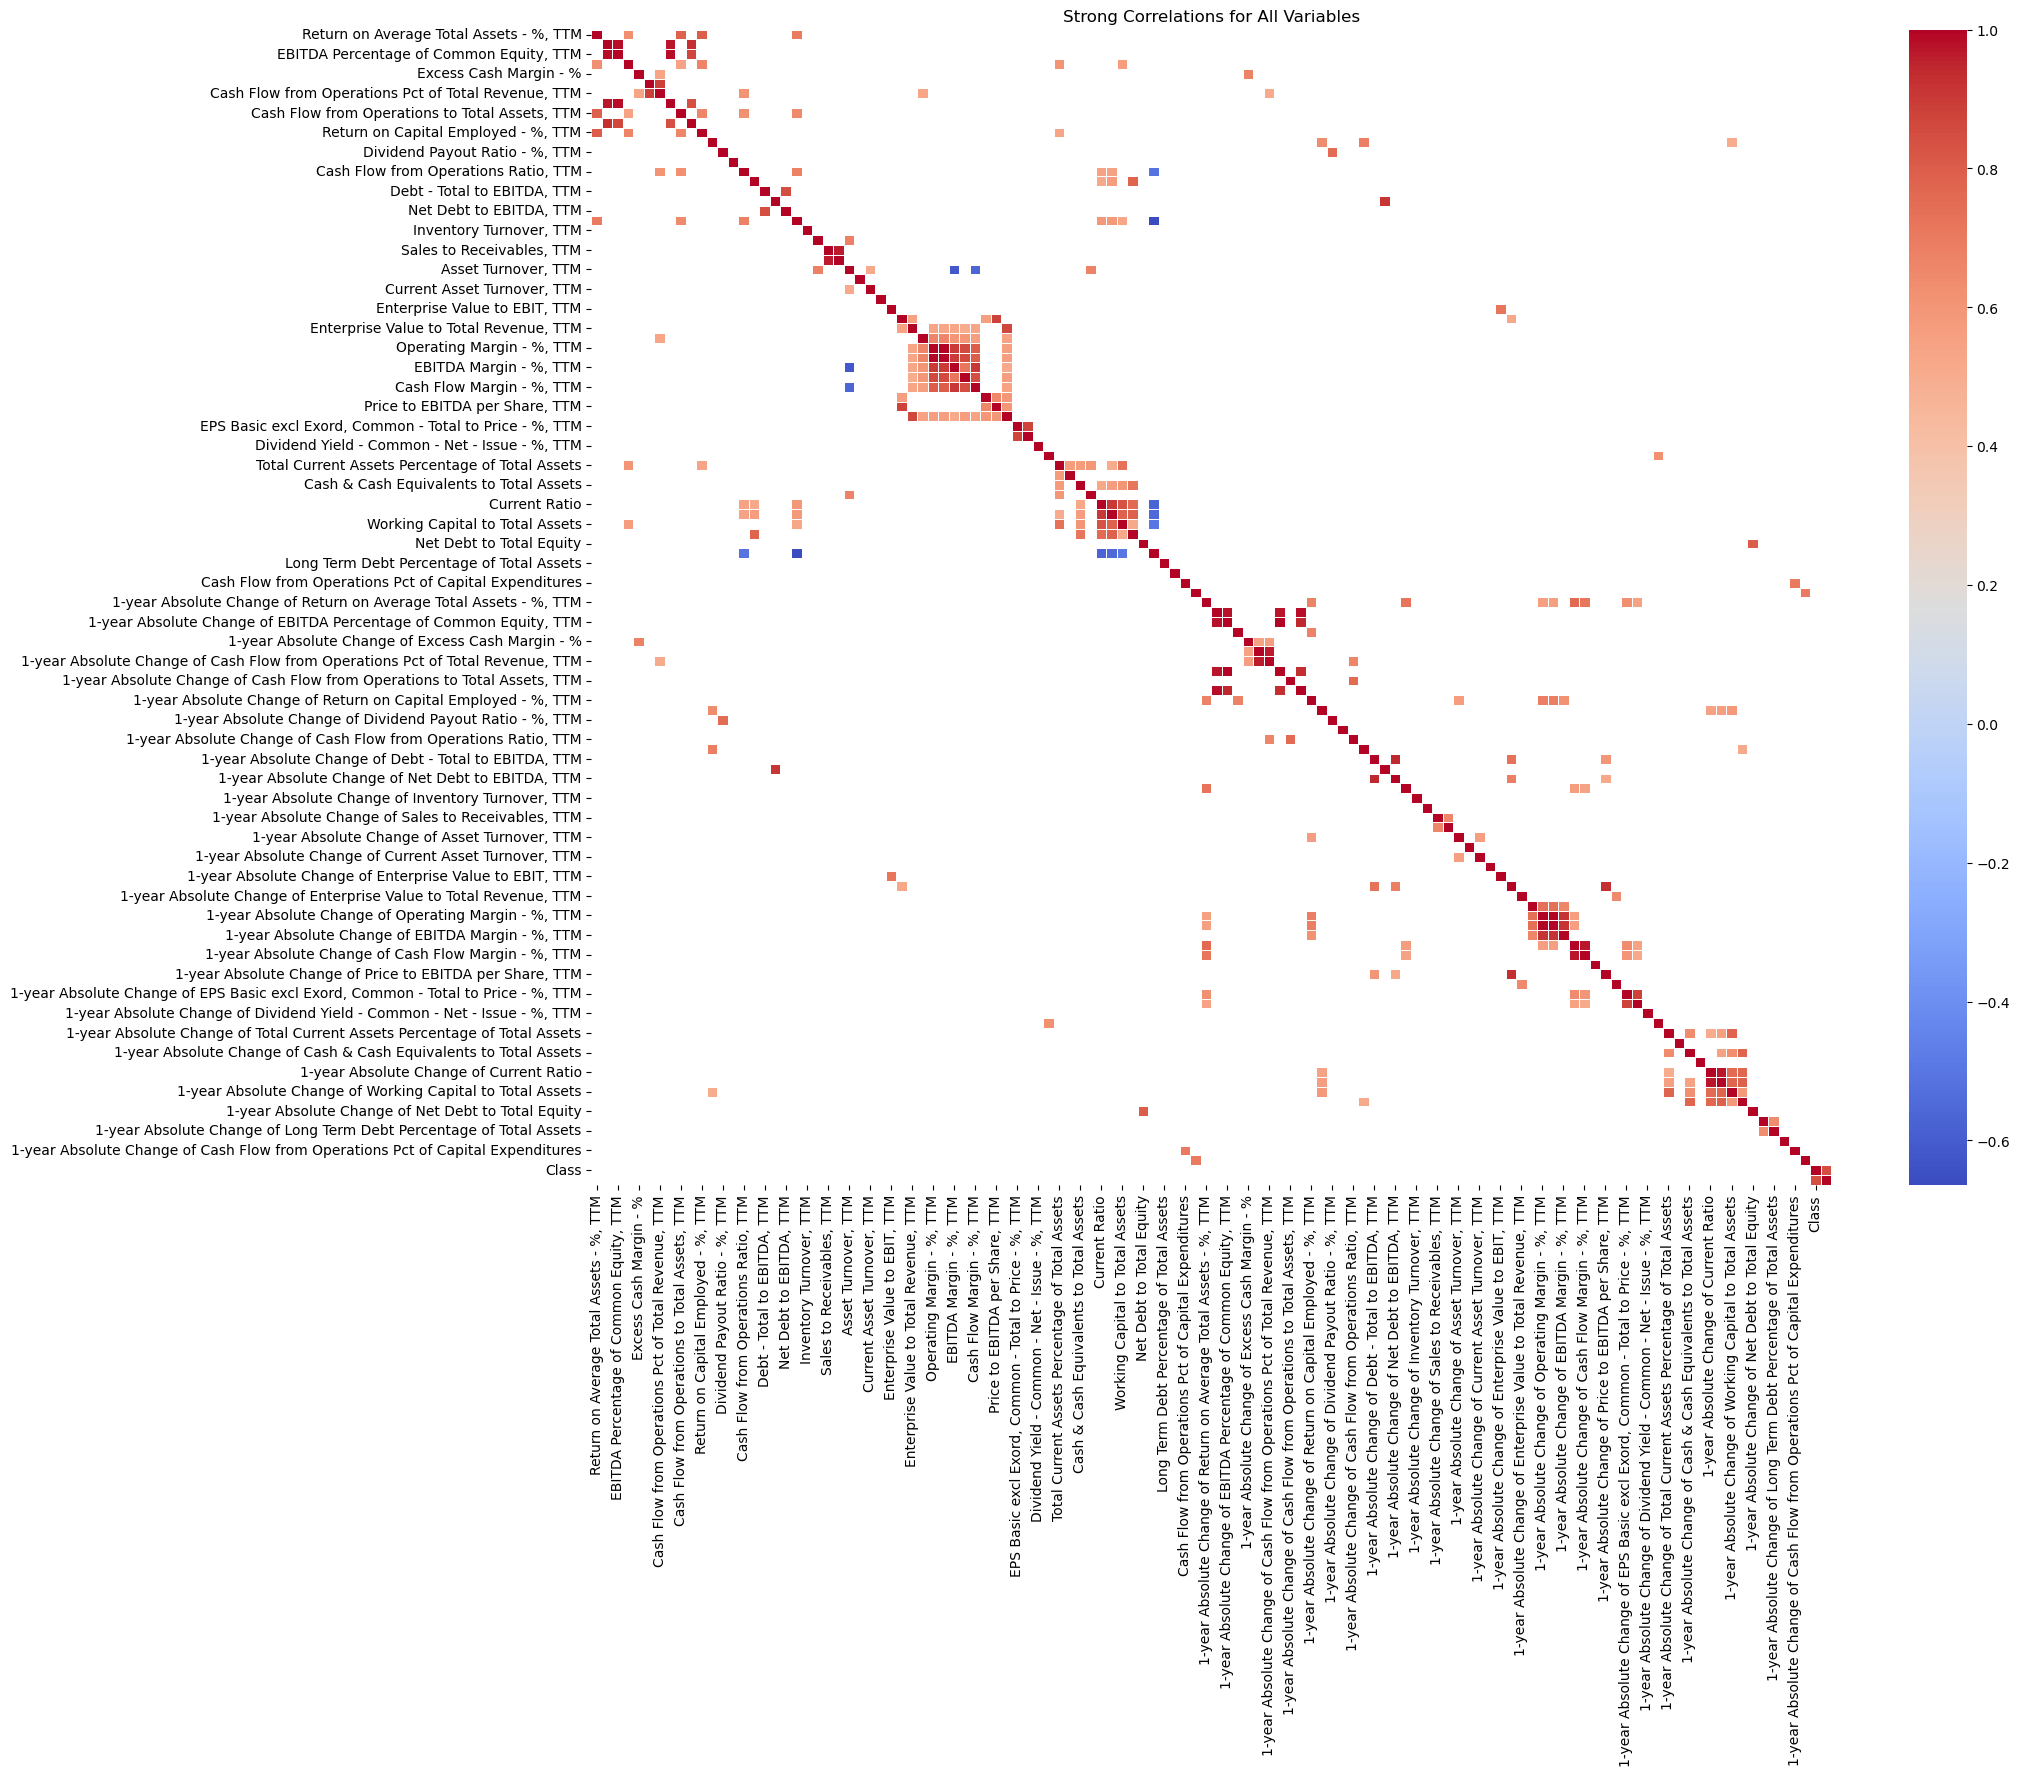

Number of correlated variables above 0.5 or below -0.5: 173


In [54]:
# Select numerical columns
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns

# Heatmap of the correlation matrix
correlation_matrix = train_df[numerical_columns].corr()

# Count correlated variables
count = 0
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            count += 1

strong_corr_matrix = correlation_matrix[abs(correlation_matrix) > 0.5]

# Show only strong correlations
strong_corr_matrix = correlation_matrix[abs(correlation_matrix) > 0.5 ]
plt.figure(figsize=(20, 15))
sns.heatmap(strong_corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Strong Correlations for All Variables')
plt.show()
print(f"Number of correlated variables above 0.5 or below -0.5: {count}")

In [110]:
#Positive correlation

# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Flatten the correlation matrix into a DataFrame with three columns
corr_pairs = correlation_matrix.unstack().reset_index()
corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Remove self-correlation and duplicate pairs
corr_pairs = corr_pairs[corr_pairs['Variable 1'] != corr_pairs['Variable 2']]
corr_pairs['Ordered Pair'] = corr_pairs.apply(lambda x: tuple(sorted([x['Variable 1'], x['Variable 2']])), axis=1)
corr_pairs.drop_duplicates(subset='Ordered Pair', inplace=True)

# Show only significant correlations
significant_corr_pairs = corr_pairs[abs(corr_pairs['Correlation']) > 0.5]

# Sort by the absolute values of correlation
significant_corr_pairs = significant_corr_pairs.assign(AbsCorrelation=significant_corr_pairs['Correlation'].abs())
significant_corr_pairs = significant_corr_pairs.sort_values(by='AbsCorrelation', ascending=False).drop(columns=['AbsCorrelation', 'Ordered Pair'])

# Reformat the DataFrame
formatted_corr_table = significant_corr_pairs.reset_index(drop=True)
formatted_corr_table.index += 1 
formatted_corr_table = formatted_corr_table[['Variable 1', 'Variable 2', 'Correlation']] 

columns_to_check = formatted_corr_table['Variable 1'].unique()

formatted_corr_table.head(40)

/var/folders/l1/26hv4ds50v70g2zr2xbmd0bm0000gn/T/ipykernel_28132/2245758042.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


,Variable 1,Variable 2,Correlation
1,"Operating Margin - %, TTM","EBIT Margin - %, TTM",1.000000
2,1-year Absolute Change of Operating Margin - %...,"1-year Absolute Change of EBIT Margin - %, TTM",1.000000
3,1-year Absolute Change of EBITDA Percentage of...,1-year Absolute Change of Cash Flow from Opera...,0.993727
4,"EBITDA Percentage of Common Equity, TTM",Cash Flow from Operations Pct of Common Equity...,0.985997
5,1-year Absolute Change of Return on Average Co...,1-year Absolute Change of Reinvestment Rate - ...,0.982220
6,"Return on Average Common Equity - %, TTM","EBITDA Percentage of Common Equity, TTM",0.981837
7,1-year Absolute Change of Return on Average Co...,1-year Absolute Change of EBITDA Percentage of...,0.975767
8,"Return on Average Common Equity - %, TTM",Cash Flow from Operations Pct of Common Equity...,0.973780
9,1-year Absolute Change of Current Ratio,1-year Absolute Change of Quick Ratio,0.972026
10,1-year Absolute Change of Return on Average Co...,1-year Absolute Change of Cash Flow from Opera...,0.972022


In [85]:
# Negative correlation

# Show only significant negative correlations
negative_corr_pairs = corr_pairs[corr_pairs['Correlation'] < -0.5]

# Sort by the absolute values of Correlation
negative_corr_pairs = negative_corr_pairs.assign(AbsCorrelation=negative_corr_pairs['Correlation'].abs())
negative_corr_pairs = negative_corr_pairs.sort_values(by='AbsCorrelation', ascending=False).drop(columns=['AbsCorrelation', 'Ordered Pair'])

# Reformat the DataFrame
formatted_negative_corr_table = negative_corr_pairs.reset_index(drop=True)
formatted_negative_corr_table.index += 1 
formatted_negative_corr_table = formatted_negative_corr_table[['Variable 1', 'Variable 2', 'Correlation']]

formatted_negative_corr_table.head(20) 

,Variable 1,Variable 2,Correlation
1,"Solvency Ratio - %, TTM",Total Liabilities Percentage of Total Assets,-0.663819
2,"Asset Turnover, TTM","EBITDA Margin - %, TTM",-0.616700
3,Current Ratio,Total Liabilities Percentage of Total Assets,-0.568447
4,"Asset Turnover, TTM","Cash Flow Margin - %, TTM",-0.561884
5,Quick Ratio,Total Liabilities Percentage of Total Assets,-0.552061
6,"Cash Flow from Operations Ratio, TTM",Total Liabilities Percentage of Total Assets,-0.508290
7,Working Capital to Total Assets,Total Liabilities Percentage of Total Assets,-0.500713


### Test for multicollinearity

In [101]:
train_df_vif = train_df
train_df_vif = train_df_vif.dropna()


# Filter columns for VIF calculation
train_df_vif = train_df_vif[columns_to_check]

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = train_df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(train_df_vif.values, i) for i in range(train_df_vif.shape[1])]


print(vif_data.sort_values(by="VIF", ascending=False).head(20))


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                             Variable           VIF
1   1-year Absolute Change of Operating Margin - %...           inf
13     1-year Absolute Change of EBIT Margin - %, TTM           inf
0                           Operating Margin - %, TTM  6.071529e+06
17                               EBIT Margin - %, TTM  6.025219e+06
15                             EBITDA Margin - %, TTM  2.861086e+03
69                          Cash Flow Margin - %, TTM  2.188138e+03
23                                Net Margin - %, TTM  1.420783e+03
2   1-year Absolute Change of EBITDA Percentage of...  1.711787e+02
11  1-year Absolute Change of Cash Flow from Opera...  1.517210e+02
3             EBITDA Percentage of Common Equity, TTM  1.182142e+02
5            Return on Average Common Equity - %, TTM  7.265493e+01
26  Cash Flow from Operations Pct of Common Equity...  6.125811e+01
28            Return on Average Total Assets - %, TTM  5.554315e+01
6             1-year Absolute Change of Current 